Initial setup for data and nodes

In [153]:
sensors = [(1,2), (10,3), (4,8), (15,7), (6,1), (9,12), (14,4), (3,10), (7,7), (12,14)]
packet_size = 2000 #[bit]
energy_base = 5 #[mJ]
circuit_energy = 50 #[nJ/bit]
k = 1 #[nJ/bit/m^2]

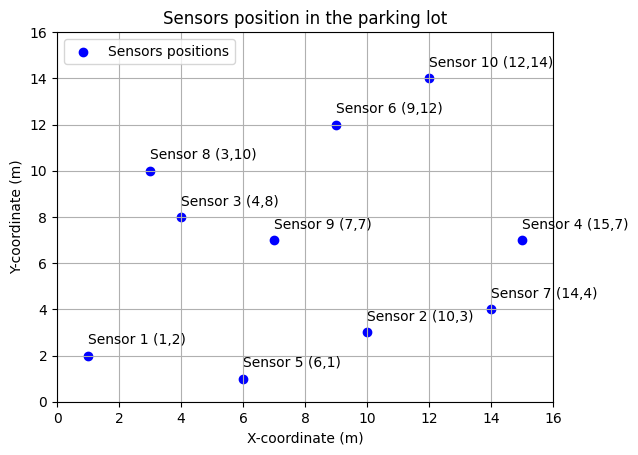

In [154]:
import matplotlib.pyplot as plt

x_coords = [sensor[0] for sensor in sensors]
y_coords = [sensor[1] for sensor in sensors]

plt.figure()
plt.scatter(x_coords, y_coords, marker='o', color='blue', label='Sensors positions')

for i in range(10):
    plt.text(x_coords[i], y_coords[i] + 0.5, f'Sensor {i+1} ({x_coords[i]},{y_coords[i]})', color='black')

plt.xlim(0, 16)
plt.ylim(0, 16)
plt.xlabel('X-coordinate (m)')
plt.ylabel('Y-coordinate (m)')
plt.title('Sensors position in the parking lot')
plt.legend()
plt.grid(True)

plt.show()

Function to calculate the euclidean distance beetween point 1 and point 2

In [155]:
import math

def distance(point1, point2):
  """Calculates the Euclidean distance between two points in 2D space.

  Args:
    point1: A tuple representing the coordinates of the first point (x, y).
    point2: A tuple representing the coordinates of the second point (x, y).

  Returns:
    The Euclidean distance between the two points.
  """
  return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

Function to calculate the energy consumpion for a sensor position to a sink poin as follows:

`E = (circuit_energy * packet_size) + k * (d**2) * packet_size`

In [156]:
def calculate_energy_consumption(sensor, point):
  d = distance(sensor, point)
  E = (circuit_energy  + k * (d**2)) * packet_size
  return(E / 1000000) # Conversion from nJ to mJ [10^-9 -> 10^-3]

Function to calculate the lifetime for a single node based on its consumption. All nodes sends a packet each 10 minutes (each 600 seconds)

In [157]:
def calculate_lifetime(consumption):
    number_of_cycles = energy_base / consumption #[s]
    return(number_of_cycles * 600)

Calculate point 1 of the exercise:

In [158]:
energy_consumptions = []
lifetimes = []

for sensor in sensors:
  energy_consumptions.append(calculate_energy_consumption(sensor, (20,20)))

for consumption in energy_consumptions:
  lifetimes.append(calculate_lifetime(consumption))

print(lifetimes)
print("The minimum lifetime is: " + str(min(lifetimes)) + " s")


[2040.8163265306123, 3416.8564920273343, 3333.333333333333, 6147.540983606557, 2471.169686985173, 6382.978723404254, 4385.964912280703, 3416.8564920273343, 3865.979381443299, 10000.0]
The minimum lifetime is: 2040.8163265306123 s


Calculate the best sink position by trying each position in the grid

In [159]:
def find_best_sink_position(grid_size=21):
    best_position = (0, 0)
    max_min_lifetime = 0

    for x in range(grid_size):
        for y in range(grid_size):
            sink_position = (x, y)
            lifetimes = []
            for sensor in sensors:
                energy_consumption = calculate_energy_consumption(sensor, sink_position)
                lifetimes.append(calculate_lifetime(energy_consumption))
            min_lifetime = min(lifetimes)

            if min_lifetime > max_min_lifetime:
                max_min_lifetime = min_lifetime
                best_position = sink_position

    return best_position, max_min_lifetime

best_sink, max_lifetime = find_best_sink_position()
print(f"The best sink position is: {best_sink}")
print(f"The maximum minimum lifetime at this position is: {max_lifetime} s")


The best sink position is: (7, 8)
The maximum minimum lifetime at this position is: 12295.081967213118 s


<ipython-input-160-7769601fc2be>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([7, x_coords[i]], [8, y_coords[i]], 'k-', alpha=0.5, color='green')


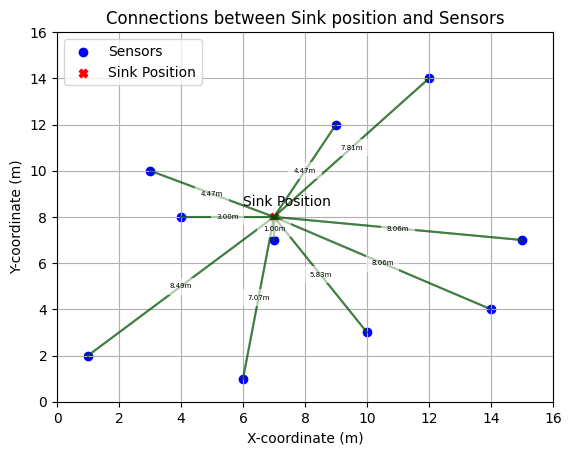

In [160]:
import numpy as np
plt.figure()

plt.scatter(x_coords, y_coords, marker='o', color='blue', label='Sensors')


#for i in range(10):
#    plt.text(x_coords[i], y_coords[i] + 0.5, f'Sensor {i} ({x_coords[i]},{y_coords[i]})', color='black')


plt.text(7 - 1, 8 + 0.5 , f'Sink Position', color='black')

plt.scatter(7, 8, marker='X', color='red', label=f'Sink Position')

for i in range(10):
    plt.plot([7, x_coords[i]], [8, y_coords[i]], 'k-', alpha=0.5)
    xx = (7 + x_coords[i]) / 2
    yy = (8 + y_coords[i]) / 2
    plt.plot([7, x_coords[i]], [8, y_coords[i]], 'k-', alpha=0.5, color='green')
    # plt.text(xx, yy, f'p_r = {p_r[i, tp_index]:.2f}', fontsize=8, ha='center', va='center')

    distance = np.sqrt((7 - x_coords[i])**2 + (8 - y_coords[i])**2)

    # Aggiungi il testo con la distanza
    plt.text(xx, yy, f'{distance:.2f}m', fontsize=5, ha='center', va='center', color='black', bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

plt.xlim(0, 16)
plt.ylim(0, 16)
plt.xlabel('X-coordinate (m)')
plt.ylabel('Y-coordinate (m)')
plt.title('Connections between Sink position and Sensors')
plt.legend()
plt.grid(True)
plt.show()

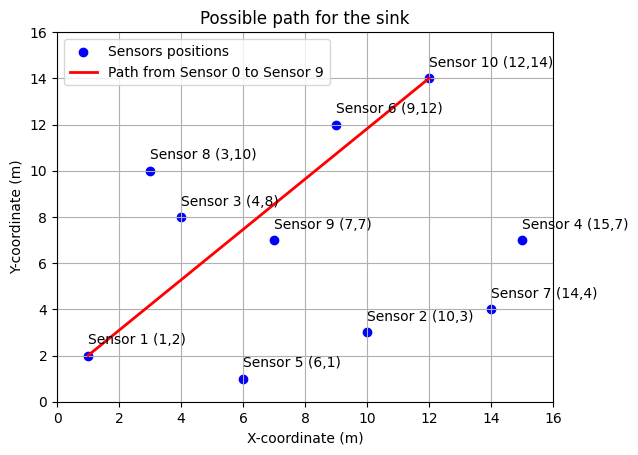

In [161]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x_coords, y_coords, marker='o', color='blue', label='Sensors positions')

for i in range(len(sensors)):
    plt.text(x_coords[i], y_coords[i] + 0.5, f'Sensor {i+1} ({x_coords[i]},{y_coords[i]})', color='black')

plt.plot([x_coords[0], x_coords[9]], [y_coords[0], y_coords[9]], 'r-', linewidth=2, label='Path from Sensor 0 to Sensor 9')

plt.xlim(0, 16)
plt.ylim(0, 16)
plt.xlabel('X-coordinate (m)')
plt.ylabel('Y-coordinate (m)')
plt.title('Possible path for the sink')
plt.legend()
plt.grid(True)

plt.show()